# Machine Learning

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

REGRESSION

In [2]:
np.random.seed(0)
m = 100
X= np.linspace(0, 10 , m).reshape(m, 1)
y= X + np.random.randn(m ,1)

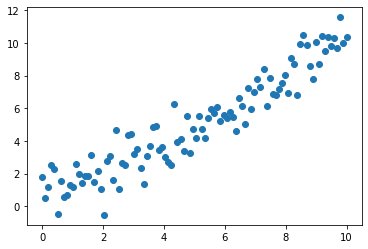

In [10]:
plt.scatter(X, y)
plt.show()

In [11]:
#model = LinearRegression()
model = SVR(C=100)
model.fit(X, y)
#R**2 Coefficient de détermination
model.score(X, y)

c:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9060736430308509

ValueError: x and y must be the same size

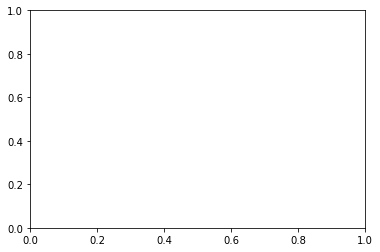

In [23]:
resultat = model.predict(X)
plt.scatter(X, y)
plt.plot( X, resultat, c='y')

Classification

In [13]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
titanic = titanic [['survived','pclass','sex','age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model = KNeighborsClassifier()

NameError: name 'KNeighborsClassifier' is not defined

In [16]:
y = titanic['survived']
X = titanic.drop('survived', axis= 1)


In [17]:
model.fit(X,y)

SVR(C=100)

In [18]:
model.score(X,y)

0.31994050769708826

In [19]:
#model.predict(X)

In [24]:
def cherif(model , pclass=1, sex=0 , age=37):
    x = np.array([pclass, sex, age]).reshape(1,3)
    #print(model.predict(x))
    print(model.predict_proba(X))

In [25]:
cherif(model)

AttributeError: 'SVR' object has no attribute 'predict_proba'

Train test split
validation set
gridSearch 
Validation Curve

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Recuperation des x et y score 70%

(150, 4)


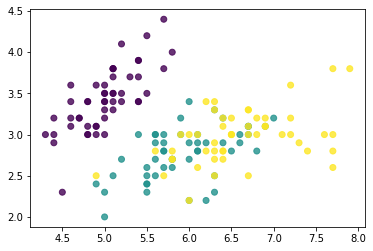

In [4]:
iris = load_iris()

X = iris.data
y = iris.target# cible target

print(X.shape)
plt.scatter(X[: , 0], X[:, 1], c=y, alpha=0.8)# y fait rerference a la target y

In [6]:
from sklearn.model_selection import train_test_split

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.8 ,random_state=  5)# l'ordre est important sinon erreur
print('les data de Train : ', X_train.shape)
print('les data de Test : ', X_test.shape)

les data de Train :  (120, 4)
les data de Test :  (30, 4)


In [ ]:
fig, ax = plt.subplot(1,2, sharex = True,figsize = (10,5) )
ax[0].scatter(X_train[:,0], c=y_train, alpha=0.83)
ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.83)

Splitage des données

Text(0.5, 1.0, 'data de test')

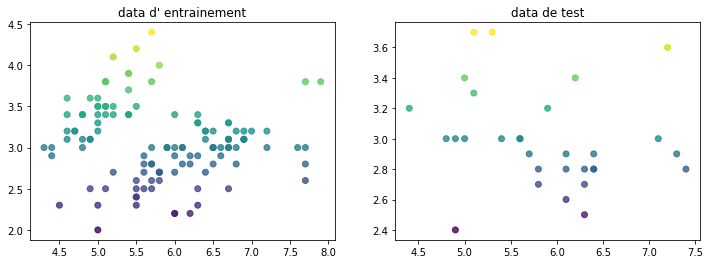

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[: , 0], X_train[:, 1], c=X_train[:,1], alpha=0.8)
plt.title( 'data d\' entrainement')

plt.subplot(122)
plt.scatter(X_test[: , 0], X_test[:, 1], c=X_test[:,1], alpha=0.8)
plt.title( 'data de test')

# creer nun model de machine learning pour predir quel type de fleur

In [22]:
from sklearn.neighbors import KNeighborsClassifier 

In [29]:
#K-NN K plus proche voisins
model = KNeighborsClassifier(n_neighbors=8)# 8 = 100% dans se cas

model.fit(X_train , y_train)

score = model.score(X_test, y_test)
print('Le score de mon model est: ',score)

Le score de mon model est:  1.0


# comprendre le proces puis l'ameliore pour arrivé a 9.999
la Val set sert a evalué le model 
psplit la dat 5 fois et reutilise la data dans plusieur teste puis calcule la moyenne don la plus celui qui a la meilleur moyenne est le bon modele

In [ ]:
#StartifieldKFold[ ///   //// ]il prend plusieur partie
#KFold[    /////           ]il prend une seul partie
#ShuffleSplite[ ///  ///  ///]